In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [2]:
file_path = r'\\ad.wayne.edu\Users\go8023\Downloads\mountains_vs_beaches_preferences.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [6]:
null_counts = df.isnull().sum()
null_counts

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == "object":
        print(str(col))
        label = LabelEncoder()
        label = label.fit(df[col])
        df[col] = label.transform(df[col].astype(str)).astype(int)
df = df.astype({col: 'int' for col in df.select_dtypes(include='object').columns})


Gender
Education_Level
Preferred_Activities
Location
Favorite_Season


In [8]:
df.head(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,1,71477,0,9,1,2477,2,175,267,2,0,1,1
1,69,1,88740,3,1,3,4777,1,228,190,0,0,1,0
2,46,0,46562,3,0,1,1469,2,71,280,3,0,0,1
3,32,2,99044,2,6,0,1482,0,31,255,2,1,0,1
4,60,0,106583,2,5,2,516,1,23,151,3,1,1,0
5,25,1,110588,1,3,2,2895,2,6,47,0,0,1,0
6,38,1,22245,0,1,3,4994,0,157,225,0,0,1,0
7,56,2,109411,0,8,2,3656,2,210,166,3,1,0,0
8,36,1,22531,3,6,3,2408,1,218,263,2,1,1,0
9,40,2,90840,2,1,3,4044,0,271,15,2,1,1,0


In [9]:
# Replace the values in the 'Income' column with bins
df['Income'] = pd.cut(
    df['Income'], 
    bins=[-float('inf'), 40000, 90000, float('inf')],  # Define bin edges
    labels=[0, 1, 2]  # Define corresponding labels
)

# Convert to integer (optional, as the labels are categorical by default)
df['Income'] = df['Income'].astype(int)



In [10]:
# Replace the values in the 'Age' column with bins
df['Age'] = pd.cut(
    df['Age'], 
    bins=[-float('inf'), 25, 40, float('inf')],  # Define bin edges
    labels=[0, 1, 2]  # Define corresponding labels
)

# Convert to integer (optional, as the labels are categorical by default)
df['Age'] = df['Age'].astype(int)



In [11]:
# Replace values in the 'Travel_Frequency' column
df['Travel_Frequency'] = pd.cut(
    df['Travel_Frequency'], 
    bins=[-float('inf'), 5, float('inf')],  # Define bin edges
    labels=[0, 1]  # Define corresponding labels
)

# Convert to integer (optional, as the labels are categorical by default)
df['Travel_Frequency'] = df['Travel_Frequency'].astype(int)



In [12]:
# Replace values in the 'Vacation_Budget' column
df['Vacation_Budget'] = pd.cut(
    df['Vacation_Budget'], 
    bins=[-float('inf'), 1000, 2500, float('inf')],  # Define bin edges
    labels=[0, 1, 2]  # Define corresponding labels
)

# Convert to integer (optional, as the labels are categorical by default)
df['Vacation_Budget'] = df['Vacation_Budget'].astype(int)




In [13]:
df = df.drop(columns=['Proximity_to_Mountains', 'Proximity_to_Beaches'])

In [14]:
df.head(10)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Favorite_Season,Pets,Environmental_Concerns,Preference
0,2,1,1,0,1,1,1,2,2,0,1,1
1,2,1,1,3,0,3,2,1,0,0,1,0
2,2,0,1,3,0,1,1,2,3,0,0,1
3,1,2,2,2,1,0,1,0,2,1,0,1
4,2,0,2,2,0,2,0,1,3,1,1,0
5,0,1,2,1,0,2,2,2,0,0,1,0
6,1,1,0,0,0,3,2,0,0,0,1,0
7,2,2,2,0,1,2,2,2,3,1,0,0
8,1,1,0,3,1,3,1,1,2,1,1,0
9,1,2,2,2,0,3,2,0,2,1,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     52444 non-null  int32
 1   Gender                  52444 non-null  int32
 2   Income                  52444 non-null  int32
 3   Education_Level         52444 non-null  int32
 4   Travel_Frequency        52444 non-null  int32
 5   Preferred_Activities    52444 non-null  int32
 6   Vacation_Budget         52444 non-null  int32
 7   Location                52444 non-null  int32
 8   Favorite_Season         52444 non-null  int32
 9   Pets                    52444 non-null  int64
 10  Environmental_Concerns  52444 non-null  int64
 11  Preference              52444 non-null  int64
dtypes: int32(9), int64(3)
memory usage: 3.0 MB


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
#1 means prefers mountatains, 0 means prefers beaches
X = df.drop(columns=['Preference'])
y = df['Preference']




# Normalizing features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Results dictionary to store performance metrics for each model
results = {
    'Regression Tree': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Ridge Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Lasso Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Principal Component Regression (PCR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Regression Splines': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Support Vector Regression (SVR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []}
}

num_features = X.shape[1]

# Running the models 20 times to compute average metrics
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=None)

    # Defining models
    models = {
        'Regression Tree': DecisionTreeRegressor(max_depth=10),  # Limit tree depth for efficiency
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.1),
        'Principal Component Regression (PCR)': make_pipeline(PCA(n_components=min(num_features, 10)), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),  # Reduce polynomial degree
        'Support Vector Regression (SVR)': SVR(kernel='linear', C=1)  # Use a simpler kernel
    }

    # Fitting models and computing metrics
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)

        results[model_name]['MSE'].append(mse)
        results[model_name]['RMSE'].append(rmse)
        results[model_name]['RSE'].append(rse)
        results[model_name]['RSS'].append(rss)
        results[model_name]['R^2'].append(r2)

# Calculating average results
average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(average_results).T
print(results_df)


                                           MSE      RMSE       RSE  \
Regression Tree                       0.135037  0.367471  0.367611   
Ridge Regression                      0.137967  0.371436  0.371578   
Lasso Regression                      0.147691  0.384304  0.384450   
Principal Component Regression (PCR)  0.138893  0.372677  0.372819   
Regression Splines                    0.138238  0.371801  0.371943   
Support Vector Regression (SVR)       0.158076  0.396925  0.397077   

                                              RSS       R^2  
Regression Tree                       2124.673534  0.280146  
Ridge Regression                      2170.765420  0.264543  
Lasso Regression                      2323.770904  0.212717  
Principal Component Regression (PCR)  2185.344860  0.259608  
Regression Splines                    2175.031405  0.263098  
Support Vector Regression (SVR)       2487.163517  0.157853  


Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 10}
Ridge Regression - Metrics: {'MSE': 0.13836620184579132, 'RMSE': 0.37197607698048446, 'RSE': 0.3721180074442746, 'RSS': 2177.0538198416807, 'R²': 0.2566636834186491}



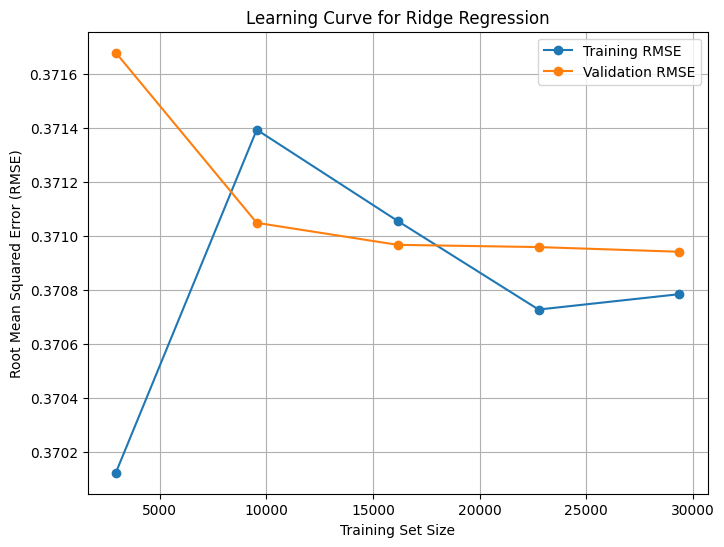

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 0.01}
Lasso Regression - Metrics: {'MSE': 0.13829046831140604, 'RMSE': 0.3718742641154481, 'RSE': 0.3720161557317207, 'RSS': 2175.8622284116627, 'R²': 0.257070542071562}



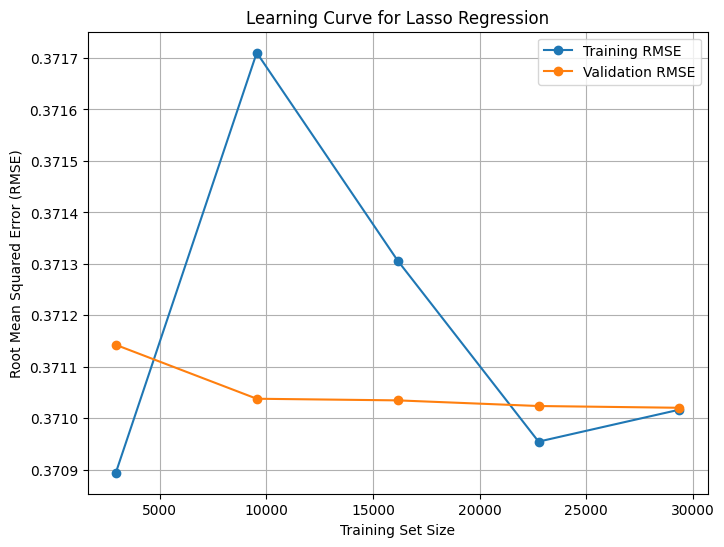

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 11}
Principal Component Regression (PCR) - Metrics: {'MSE': 0.13836687676668094, 'RMSE': 0.3719769841894535, 'RSE': 0.3721189149993965, 'RSS': 2177.064439046958, 'R²': 0.2566600575822716}



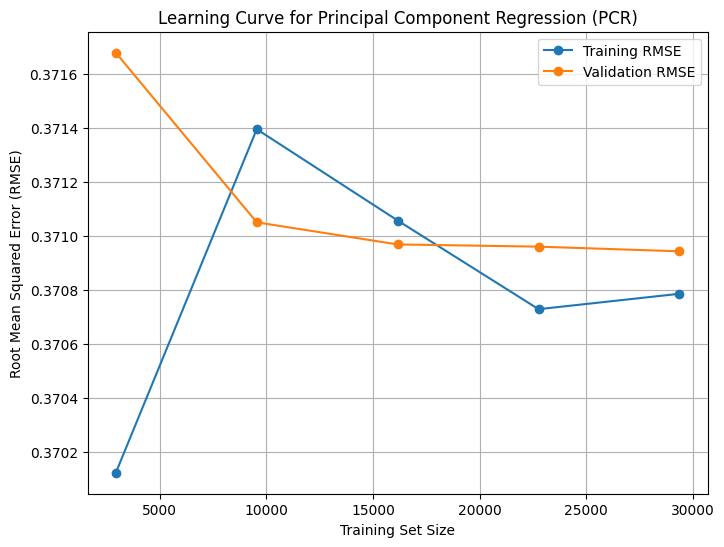

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 3}
Regression Splines - Metrics: {'MSE': 0.12646669040675446, 'RMSE': 0.3556215550367475, 'RSE': 0.35575724530115876, 'RSS': 1989.8269068598747, 'R²': 0.32059070377633314}



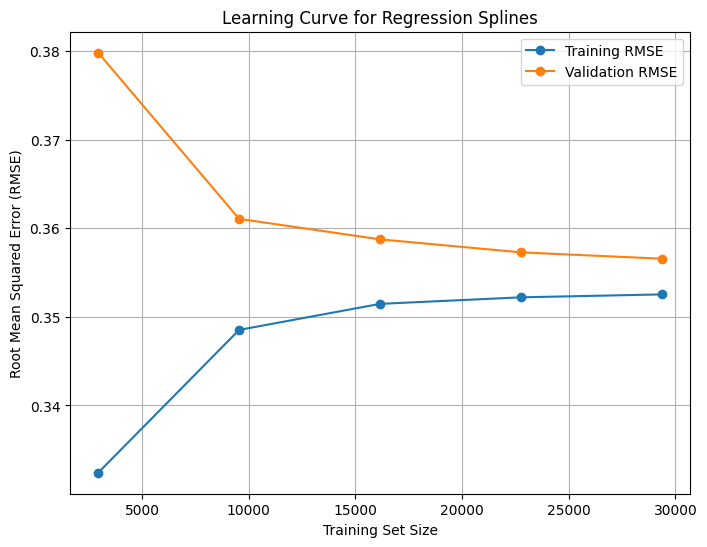

Running GridSearchCV for Regression Tree...
Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 4, 'decisiontreeregressor__min_samples_split': 10}
Regression Tree - Metrics: {'MSE': 0.12492014649543966, 'RMSE': 0.35344044264266034, 'RSE': 0.353575300686096, 'RSS': 1965.4935849592475, 'R²': 0.32889910741199335}



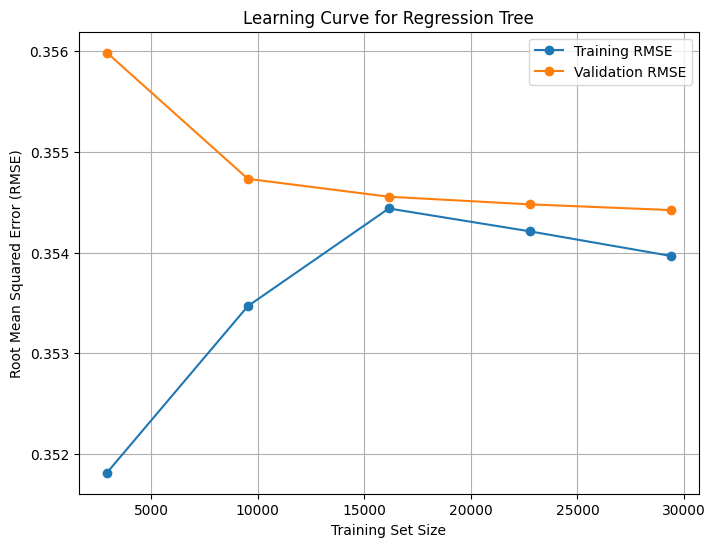

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 0.1, 'svr__epsilon': 0.1}
Support Vector Regression (SVR) - Metrics: {'MSE': 0.1532931316858576, 'RMSE': 0.39152666791146884, 'RSE': 0.39167605806046435, 'RSS': 2411.9141339452835, 'R²': 0.17647264762257175}



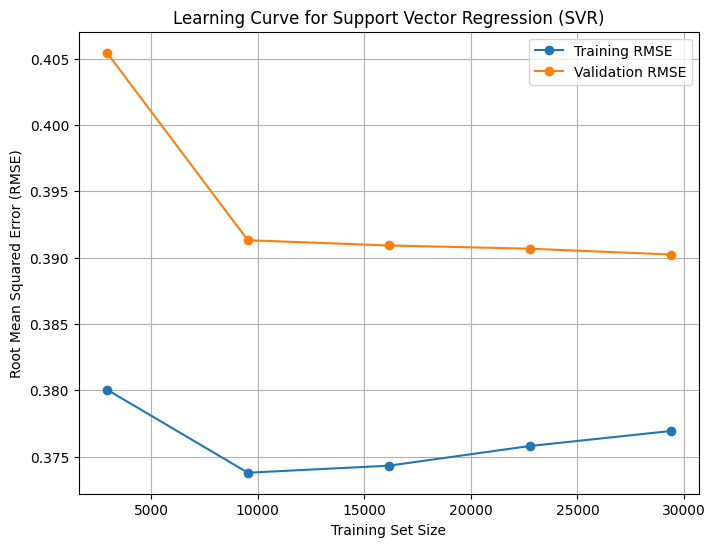


Model Performance Metrics:
                                           MSE      RMSE       RSE  \
Ridge Regression                      0.138366  0.371976  0.372118   
Lasso Regression                      0.138290  0.371874  0.372016   
Principal Component Regression (PCR)  0.138367  0.371977  0.372119   
Regression Splines                    0.126467  0.355622  0.355757   
Regression Tree                       0.124920  0.353440  0.353575   
Support Vector Regression (SVR)       0.153293  0.391527  0.391676   

                                              RSS        R²  
Ridge Regression                      2177.053820  0.256664  
Lasso Regression                      2175.862228  0.257071  
Principal Component Regression (PCR)  2177.064439  0.256660  
Regression Splines                    1989.826907  0.320591  
Regression Tree                       1965.493585  0.328899  
Support Vector Regression (SVR)       2411.914134  0.176473  

Best Parameters for Each Model:
Ridge Regressi

In [17]:

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve


# Define parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3, 4]},
    'Regression Tree': {
      'decisiontreeregressor__max_depth': [3, 4, 5],
      'decisiontreeregressor__min_samples_split': [10, 15, 20],
      'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
},
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1]}
}



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

# Function to plot learning curves
def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='o')
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o')
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid()
    plt.show()

# Dictionary to store results
results = {}
best_parameters = {}

# Iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Define the model pipeline
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters
    best_parameters[model_name] = grid_search.best_params_

    # Predict on the test set using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    # Plot learning curve for the best model
    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Display best parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")


In [18]:
results_df

,MSE,RMSE,RSE,RSS,R²
Ridge Regression,0.138366,0.371976,0.372118,2177.053820,0.256664
Lasso Regression,0.138290,0.371874,0.372016,2175.862228,0.257071
Principal Component Regression (PCR),0.138367,0.371977,0.372119,2177.064439,0.256660
Regression Splines,0.126467,0.355622,0.355757,1989.826907,0.320591
Regression Tree,0.124920,0.353440,0.353575,1965.493585,0.328899
Support Vector Regression (SVR),0.153293,0.391527,0.391676,2411.914134,0.176473
